In [1]:
import numpy as np

4. Write a function my_bisection(f,a,b,tol) that returns [R,E], where f is a function object, a and b are scalars such that a < b, and tol is a strictly positive scalar value. The function should return an array, R, where R[i] is the estimation of the root of f defined by $\frac{(a +b)}{2}$ for the $i^{th}$ iteration of the bisection method. Remember to include the initial estimate. The function should also return an array, E, where E[i] is the value of |f (R[i])| for the ith iteration of the bisection method. 

The function should terminate when E(i) < tol. Assume that sign(f (a)) $\neq$ sign(f (b)).          
Clarification: The input a and b constitute the first iteration of bisection; therefore, R and E should
never be empty.

Test cases:                                                                                             
In:                                                                                                       
`f = lambda x: x**2 - 2 `                                                                                                        
`[R, E] = my_bisection(f, 0, 2, 1e-1)  `                                                                     
Out:                                                                                                
     R = [1, 1.5, 1.25, 1.375, 1.4375]                                                                    
     E = [1, 0.25, 0.4375, 0.109375, 0.06640625]
     
In:                                                                                                
`f = lambda x: np.sin(x) - np.cos(x)`                                                              
`[R, E] = my_bisection(f, 0, 2, 1e-2)`                                                              
Out:                                                                                                
R = [1, 0.5, 0.75, 0.875, 0.8125, 0.78125]                                                             
E = [0.30116867893975674, 0.39815702328616975,0.05005010885048666, 0.12654664407270177,0.038323093040207645, 0.005866372111545948]

In [2]:
def my_bisection(f, a, b, tol):
    R = [a, b]
    E = [abs(f(a)), abs(f(b))]
    
    while E[-1] >= tol:
        c = (a + b) / 2
        R.append(c)
        E.append(abs(f(c)))
        
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return R, E

In [3]:
f = lambda x: x**2 - 2
[R, E] = my_bisection(f, 0, 2, 1e-1)

print("R=", R,'\nE=', E)

R= [0, 2, 1.0, 1.5, 1.25, 1.375, 1.4375] 
E= [2, 2, 1.0, 0.25, 0.4375, 0.109375, 0.06640625]


In [4]:
f = lambda x: np.sin(x) - np.cos(x)
[R, E] = my_bisection(f, 0, 2, 1e-2)

print("R=", R,'\nE=', E)

R= [0, 2, 1.0, 0.5, 0.75, 0.875, 0.8125, 0.78125] 
E= [1.0, 1.325444263372824, 0.30116867893975674, 0.39815702328616975, 0.050050108850486774, 0.12654664407270189, 0.038323093040207756, 0.005866372111545948]


5. Write a function my_newton(f,df,x0,tol) that returns [R,E], where f is a function object, df is a function object giving the derivative of f, x0 is an initial estimation of the root, and tol is a strictly positive scalar. The function should return an array, R, where R[i] is the Newton–Raphson estimate of the root of f for the ith iteration. Remember to include the initial estimate. The function should also return an array, E, where E[i] is the value of |f (R[i])| for the ith iteration of the Newton–Raphson method. The function should terminate when E(i) < tol. Assume that the derivative of f will not hit zero during any iteration for any of the test cases given.

Test cases:

In:                                                                                                
`f = lambda x: x**2 - 2`                                                                            
`df = lambda x: 2*x`                                                                                
`[R, E] = my_newton(f, df, 1, 1e-5)`                                                                
Out:                                                                                                          
R = [1, 1.5, 1.4166666666666667, 1.4142156862745099]                                                 
E = [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]

In:                                                                                               
`f = lambda x: np.sin(x) - np.cos(x)`                                                              
`df = lambda x: np.cos(x) + np.sin(x)`                                                              
`[R, E] = my_newton(f, df, 1, 1e-5)`

Out:                                                                                                 
R = [1, 0.782041901539138, 0.7853981759997019]                                                           
E = [0.30116867893975674, 0.004746462127804163,1.7822277875723103e-08]

In [5]:
def my_newton(f, df, x0, tol):
    R = [x0]
    E = [abs(f(x0))]
    
    while E[-1] >= tol:
        x = R[-1]
        dx = df(x)
        
        if dx == 0:
            break
        
        x_new = x - f(x) / dx
        R.append(x_new)
        E.append(abs(f(x_new)))
    
    return R, E

In [6]:
f = lambda x: x**2 - 2
df = lambda x: 2 * x
[R, E] = my_newton(f, df, 1, 1e-5)

print("R=", R,'\nE=', E)

R= [1, 1.5, 1.4166666666666667, 1.4142156862745099] 
E= [1, 0.25, 0.006944444444444642, 6.007304882871267e-06]


In [7]:
f = lambda x: np.sin(x) - np.cos(x)
df = lambda x: np.cos(x) + np.sin(x)
[R, E] = my_newton(f, df, 1, 1e-5)

print("R=", R,'\nE=', E)

R= [1, 0.782041901539138, 0.7853981759997019] 
E= [0.30116867893975674, 0.004746462127804163, 1.7822277875723103e-08]


6. Consider the problem of building a pipeline from an offshore oil platform, a distance $H$ miles from the shoreline, to an oil refinery station on land, a distance $L$ miles along the shore. The cost of building the pipe is $C_{ocean/mile}$ while the pipe is under the ocean, and $C_{land/mile}$ while the pipe is on land. The pipe will be built in a straight line toward the shore where it will make contact at some point, $x$, between $0$ and $L$. It will continue along the shore on land until it reaches the oil refinery.
See the following figure for clarification.
Write a function `my_pipe_builder(C_ocean,C_land,L,H)` where the input arguments are as described
earlier, and $x$ is the x-value that minimizes the total cost of the pipeline. Use the bisection
method to determine this value to within a tolerance of $1 × 10^{-6}$, starting at an initial bound of $a = 0$ and $b = L.$

Test cases:

In:  `my_pipe_builder(20, 10, 100, 50)`                                                              
Out: 28.867512941360474

In:  `my_pipe_builder(30, 10, 100, 50)`                                                                 
Out: 17.677670717239380

In:  `my_pipe_builder(30, 10, 100, 20)`                                                            
Out: 7.071067392826080

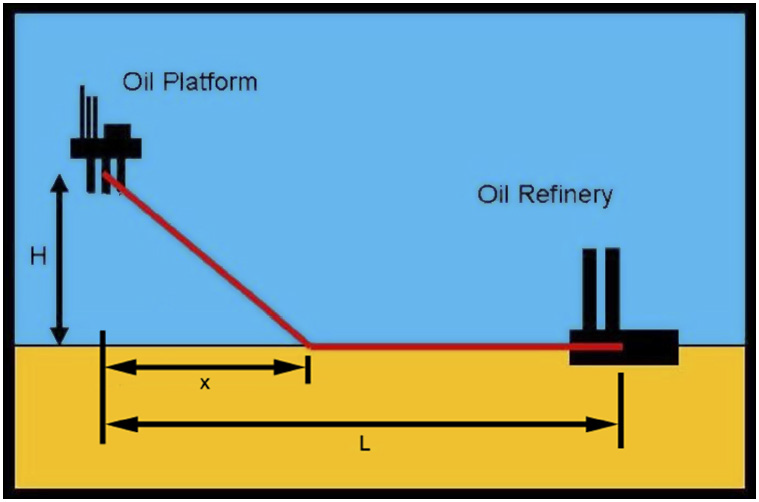

In [8]:
def my_pipe_builder(C_ocean, C_land, L, H):
    def total_cost(x):
        cost_underwater = C_ocean * ((H**2 + x**2)**0.5)
        cost_land = C_land * (L - x)
        return cost_underwater + cost_land
    
    a = 0  # Initial lower bound
    b = L  # Initial upper bound
    tolerance = 1e-6
    
    while (b - a) > tolerance:
        x = (a + b) / 2        # Calculate the midpoint
        cost_x = total_cost(x) # Calculate the total cost at the midpoint
        # Calculate the total cost at the midpoint's neighbors
        cost_left = total_cost(x - tolerance)
        cost_right = total_cost(x + tolerance)
        
        if cost_left < cost_x:      # Update the upper bound
            b = x
        elif cost_right < cost_x:   # Update the lower bound
            a = x
        else:                       # The midpoint is the optimal solution
            break
    return x

In [9]:
my_pipe_builder(20, 10, 100, 50) 

28.867512941360474

In [10]:
my_pipe_builder(30, 10, 100, 50)

17.67766922712326

In [11]:
my_pipe_builder(30, 10, 100, 20)

7.07106739282608

7. Find a function $f (x)$ and guess the root of $f$ , namely $x_0$, such that the Newton–Raphson method will oscillate between $x_0$ and $−x_0$ indefinitely.

In [12]:
def newton_raphson(f, f_prime, x0, tolerance, max_iterations):
    x = x0
    iterations = 0
    
    while abs(f(x)) > tolerance and iterations < max_iterations:
        x = x - f(x) / f_prime(x)
        iterations += 1    
    return x

In [13]:
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

# Set the initial guess and other parameters
x0 = 1
tolerance = 1e-6
max_iterations = 100

# Apply the Newton-Raphson method
root = newton_raphson(f, f_prime, x0, tolerance, max_iterations)

print("Root:", root)

Root: 2.923566201412306e-13


In [14]:
def f(x):
    return x**3 - x

def f_prime(x):
    return 3*x**2 - 1

# Set the initial guess and other parameters
x0 = 1.0
tolerance = 1e-6
max_iterations = 100

# Apply the Newton-Raphson method
root = newton_raphson(f, f_prime, x0, tolerance, max_iterations)

print("Root:", root)

Root: 1.0


In [15]:
def f(x):
    return x**3

def f_prime(x):
    return 3*x**2

# Set the initial guess and other parameters
x0 = 0.5
tolerance = 1e-6
max_iterations = 100

# Apply the Newton-Raphson method
root = newton_raphson(f, f_prime, x0, tolerance, max_iterations)

print("Root:", root)

Root: 0.008670764957916306
